## Customer Satisfaction

### Data Introduction

Data contains 370 features of 76020 customers, the object is to identified the relationship between feature and satisfaction.

Roadmap:

1. Feature Analysis
2. Dimentionality reduction
3. Filtering outliers
4. Train-test split
5. Modeling: XGBoost Classifier - Fit model with early-stopping 
   

### Load and Explore the Data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train_set = pd.read_csv('train.csv') 
test_set = pd.read_csv('test.csv')

In [3]:
train_set.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
train_set.shape

(76020, 371)

In [5]:
test_set.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [6]:
test_set.shape

(75818, 370)

In [7]:
train_set.columns.difference(test_set.columns)

Index(['TARGET'], dtype='object')

In [8]:
typedf = train_set.dtypes.reset_index()
typedf.columns = ['Count', 'Data Type']
typedf.groupby('Data Type').aggregate('count').reset_index()

,Data Type,Count
0,int64,260
1,float64,111


### Detection of NaN value

In [9]:
train_set.isna().any()

ID                               False
var3                             False
var15                            False
imp_ent_var16_ult1               False
imp_op_var39_comer_ult1          False
imp_op_var39_comer_ult3          False
imp_op_var40_comer_ult1          False
imp_op_var40_comer_ult3          False
imp_op_var40_efect_ult1          False
imp_op_var40_efect_ult3          False
imp_op_var40_ult1                False
imp_op_var41_comer_ult1          False
imp_op_var41_comer_ult3          False
imp_op_var41_efect_ult1          False
imp_op_var41_efect_ult3          False
imp_op_var41_ult1                False
imp_op_var39_efect_ult1          False
imp_op_var39_efect_ult3          False
imp_op_var39_ult1                False
imp_sal_var16_ult1               False
ind_var1_0                       False
ind_var1                         False
ind_var2_0                       False
ind_var2                         False
ind_var5_0                       False
ind_var5                 

In [10]:
test_set.isna().any()

ID                               False
var3                             False
var15                            False
imp_ent_var16_ult1               False
imp_op_var39_comer_ult1          False
imp_op_var39_comer_ult3          False
imp_op_var40_comer_ult1          False
imp_op_var40_comer_ult3          False
imp_op_var40_efect_ult1          False
imp_op_var40_efect_ult3          False
imp_op_var40_ult1                False
imp_op_var41_comer_ult1          False
imp_op_var41_comer_ult3          False
imp_op_var41_efect_ult1          False
imp_op_var41_efect_ult3          False
imp_op_var41_ult1                False
imp_op_var39_efect_ult1          False
imp_op_var39_efect_ult3          False
imp_op_var39_ult1                False
imp_sal_var16_ult1               False
ind_var1_0                       False
ind_var1                         False
ind_var2_0                       False
ind_var2                         False
ind_var5_0                       False
ind_var5                 

### Dimensionality Reduction

In [13]:
from sklearn.decomposition import TruncatedSVD, FastICA, PCA  
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

In [14]:
n_comp = 12

# Truncated SVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=20)
tsvd_train = tsvd.fit_transform(train_set.drop(['TARGET'], axis=1))
tsvd_test = tsvd.transform(test_set)

# PCA
pca = PCA(n_components=n_comp, random_state=20)
pca_train = pca.fit_transform(train_set.drop(['TARGET'], axis=1))
pca_test = pca.transform(test_set)

# ICA - inceased tolerance to 0.01 to avoid warning of not-converged
ica = FastICA(n_components=n_comp, random_state=20, tol=0.01)   
ica_train = ica.fit_transform(train_set.drop(['TARGET'], axis=1))
ica_test = ica.transform(test_set)

# GRP
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=20)
grp_train = grp.fit_transform(train_set.drop(['TARGET'], axis=1))
grp_test = grp.transform(test_set)

# SRP
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=20)
srp_train = srp.fit_transform(train_set.drop(['TARGET'], axis=1))
srp_test = srp.transform(test_set)

In [15]:
work_columns = list(set(train_set.columns) - set(['TARGET']))

for i in range(1, n_comp + 1):
    train_set['pca_' + str(i)] = pca_train[:, i - 1].copy()
    test_set['pca_' + str(i)] = pca_test[:, i - 1].copy()

    train_set['ica_' + str(i)] = ica_train[:, i - 1].copy()
    test_set['ica_' + str(i)] = ica_test[:, i - 1].copy()

    train_set['tsvd_' + str(i)] = tsvd_train[:, i - 1].copy()
    test_set['tsvd_' + str(i)] = tsvd_test[:, i - 1].copy()

    train_set['grp_' + str(i)] = grp_train[:, i - 1].copy()
    test_set['grp_' + str(i)] = grp_test[:, i - 1].copy()

    train_set['srp_' + str(i)] = srp_train[:, i - 1].copy()
    test_set['srp_' + str(i)] = srp_test[:, i - 1].copy()

In [16]:
train_set.shape

(76020, 431)

In [17]:
train_set.columns.difference(test_set.columns)

Index(['TARGET'], dtype='object')

In [18]:
X = train_set.drop(["TARGET","ID"],axis=1)
y = train_set.TARGET.values

# List of features
features = train_set.columns[1:-1]

In [19]:
id_test = test_set.ID
df_test = test_set.drop(["ID"],axis=1)

In [20]:
print(X.shape, y.shape, df_test.shape)

(76020, 429) (76020,) (75818, 429)


### Create a XGBoost Classifier model

In [21]:
import xgboost as xgb

In [22]:
from sklearn.model_selection import train_test_split

seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
eval_set = [(X_test, y_test)]

In [23]:

model = xgb.XGBRegressor(objective='binary:logistic',
                          silent=1,
                          nthread=4,
                          eval_metric='auc',
                          booster='gbtree',
                          max_depth=5,
                          min_child_weight=7,
                          scale_pos_weight=1,
                          subsample=0.9, 
                          colsample_bytree=0.6,
                          eta=0.025,
                          seed=1)

model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, eta=0.025, eval_metric='auc', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1, silent=1, subsample=0.9)

In [24]:
# Fit with early stopping

model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.611404
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.544319
[2]	validation_0-logloss:0.489024
[3]	validation_0-logloss:0.442067
[4]	validation_0-logloss:0.40211
[5]	validation_0-logloss:0.367839
[6]	validation_0-logloss:0.33833
[7]	validation_0-logloss:0.312896
[8]	validation_0-logloss:0.290841
[9]	validation_0-logloss:0.271484
[10]	validation_0-logloss:0.254727
[11]	validation_0-logloss:0.239936
[12]	validation_0-logloss:0.226955
[13]	validation_0-logloss:0.215588
[14]	validation_0-logloss:0.205517
[15]	validation_0-logloss:0.196746
[16]	validation_0-logloss:0.188991
[17]	validation_0-logloss:0.182104
[18]	validation_0-logloss:0.176349
[19]	validation_0-logloss:0.171281
[20]	validation_0-logloss:0.166407
[21]	validation_0-logloss:0.162191
[22]	validation_0-logloss:0.158568
[23]	validation_0-logloss:0.155237
[24]	validation_0-logloss:0.152273
[25]	validation_0-logloss:0.149726
[26]	validation_0-logloss:0.147423

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, eta=0.025, eval_metric='auc', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1, silent=1, subsample=0.9)

### Features Visualization

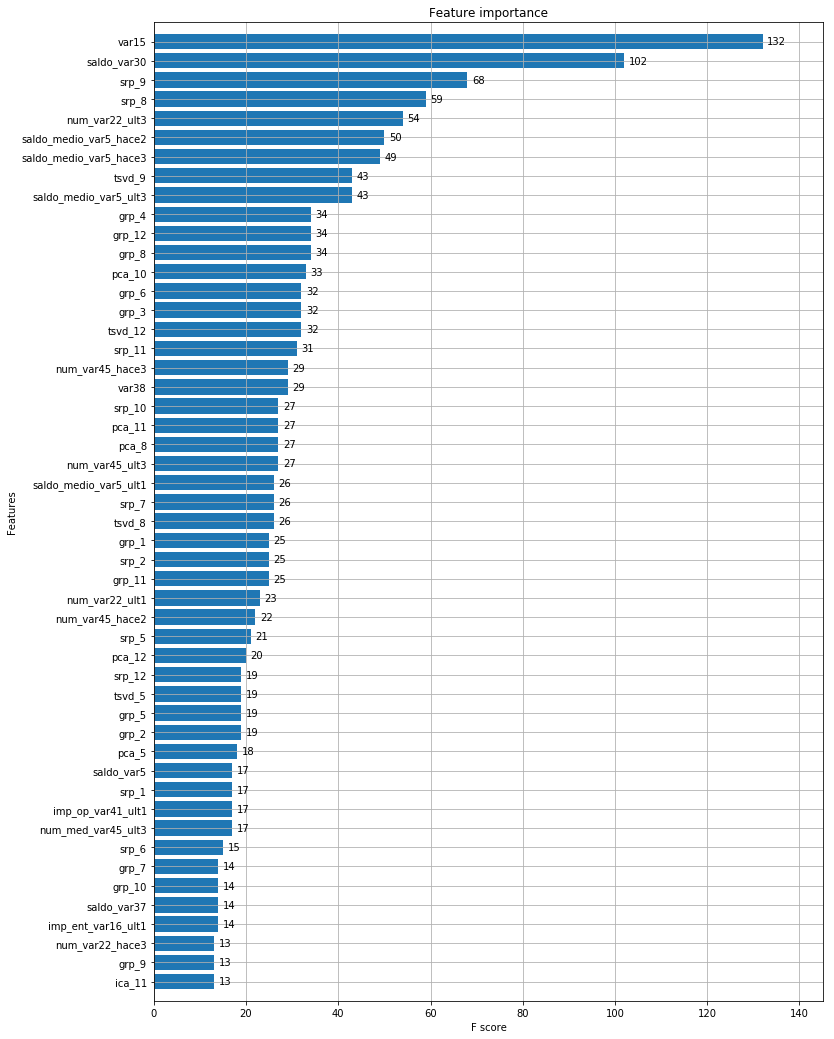

In [25]:
# plot the features importance
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()


In [26]:
# var15 accounts for the most important feature 
# presume to be age of customers

X_train['var15'].describe()

count    60816.000000
mean        33.253272
std         12.991514
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        104.000000
Name: var15, dtype: float64

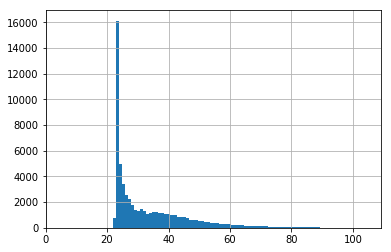

In [27]:
# plot a histogram of var15

X_train['var15'].hist(bins=100)
plt.show()

In [28]:
y_pred = model.predict(df_test)
predictions = [round(value) for value in y_pred]

### Evaluate model performance

In [30]:
# evaluate predictions
from sklearn.metrics import accuracy_score

y_trunc = y[:len(predictions)]

accuracy = accuracy_score(y_trunc, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.02%


In [31]:
import pickle

def save_model_pickle(estimator, model_url):             
    save_it = model_url
    pickle.dump(estimator, open(save_it, 'wb'))       

submission = pd.DataFrame()
submission['ID'] = id_test
submission['y'] = y_pred

submission.to_csv('satis_sub.csv', index=False)
save_model_pickle(model, 'satis_Model.csv')
